<a href="https://colab.research.google.com/github/Dabendal/Data-Projects/blob/main/EsportsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Personal Project : Esport Growth Analysis
##By: Mohamed Reda Ben Taleb
###Date: 30/12/2023

## Introduction :
In the dynamic realm of esports, where virtual battlegrounds have become the stage for thrilling competitions and cultural phenomena, the landscape is as varied as the games themselves. Over the past decade, various esports scenes have emerged, each with its own unique trajectory, challenges, and triumphs. This analysis project embarks on a journey to dissect the diverse esports ecosystems, seeking to unravel the distinct factors that have propelled certain scenes to greater success.

In [ ]:
#import relevant packages
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

##Importing the Data

In [ ]:
url = "https://raw.githubusercontent.com/Dabendal/EsportsDataAnalysis/main/ESport_Earnings.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')


In [ ]:
#Details about the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IdNo                  504 non-null    int64  
 1   TotalMoney            504 non-null    float64
 2   GameName              504 non-null    object 
 3   Genre                 504 non-null    object 
 4   PlayerNo              504 non-null    int64  
 5   TournamentNo          504 non-null    int64  
 6   Top_Country           504 non-null    object 
 7   Top_Country_Earnings  504 non-null    float64
 8   Releaseyear           504 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 35.6+ KB


In [ ]:
#Showcases the top 5 elements of our dataframe and allows us to see what our dataframe looks like
df.head(5)

,IdNo,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear
0,613,310.00,Acceleration of SUGURI 2,Fighting Game,6,2,United States,310.00,2018
1,510,190075.61,Age of Empires,Strategy,246,95,Viet Nam,123408.43,1997
2,179,1492489.51,Age of Empires II,Strategy,956,576,China,174252.44,1999
3,177,68113.85,Age of Empires III,Strategy,106,76,United States,18523.52,2005
4,540,2668.00,Age of Empires Online,Strategy,16,7,Germany,1264.00,2011


In [ ]:
#Showcases different descriptive values regarding our dataframe
df.describe()

,IdNo,TotalMoney,PlayerNo,TournamentNo,Top_Country_Earnings,Releaseyear
count,504.000000,5.040000e+02,504.000000,504.000000,5.040000e+02,504.000000
mean,440.972222,1.744743e+06,186.738095,80.746032,6.010823e+05,2006.982143
std,163.464867,1.269146e+07,795.779782,412.460699,3.751800e+06,89.354220
min,151.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,11.000000
25%,276.750000,1.375202e+03,4.000000,1.000000,3.913000e+02,2006.000000
50%,454.500000,3.600856e+04,20.000000,5.000000,1.711679e+04,2013.000000
75%,580.250000,2.057516e+05,86.000000,25.250000,1.036039e+05,2017.000000
max,706.000000,2.274199e+08,13032.000000,5909.000000,6.506061e+07,2020.000000


In [ ]:
#Showcasing only the numerical attributes
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T




,count,mean,std,min,25%,50%,75%,max
IdNo,504.0,4.409722e+02,1.634649e+02,151.0,276.7500,454.500,580.2500,7.060000e+02
TotalMoney,504.0,1.744743e+06,1.269146e+07,0.0,1375.2025,36008.560,205751.5525,2.274199e+08
PlayerNo,504.0,1.867381e+02,7.957798e+02,0.0,4.0000,20.000,86.0000,1.303200e+04
TournamentNo,504.0,8.074603e+01,4.124607e+02,0.0,1.0000,5.000,25.2500,5.909000e+03
Top_Country_Earnings,504.0,6.010823e+05,3.751800e+06,0.0,391.3000,17116.795,103603.8750,6.506061e+07
Releaseyear,504.0,2.006982e+03,8.935422e+01,11.0,2006.0000,2013.000,2017.0000,2.020000e+03


In [ ]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T

# Displaying summary statistics
cat_summary_stats

,count,unique,top,freq
GameName,504,503,Battalion 1944,2
Genre,504,11,Fighting Game,160
Top_Country,504,33,United States,238


In [ ]:
#Null Values in the Dataset
null_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.to_frame()

,0
IdNo,0.0
TotalMoney,0.0
GameName,0.0
Genre,0.0
PlayerNo,0.0
TournamentNo,0.0
Top_Country,0.0
Top_Country_Earnings,0.0
Releaseyear,0.0


Our dataframe has no null values as observed here.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Battle Royale'),
  Text(1, 0, 'Collectible Card Game'),
  Text(2, 0, 'Fighting Game'),
  Text(3, 0, 'First-Person Shooter'),
  Text(4, 0, 'Multiplayer Online Battle Arena'),
  Text(5, 0, 'Puzzle Game'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Role-Playing Game'),
  Text(8, 0, 'Sports'),
  Text(9, 0, 'Strategy'),
  Text(10, 0, 'Third-Person Shooter')])

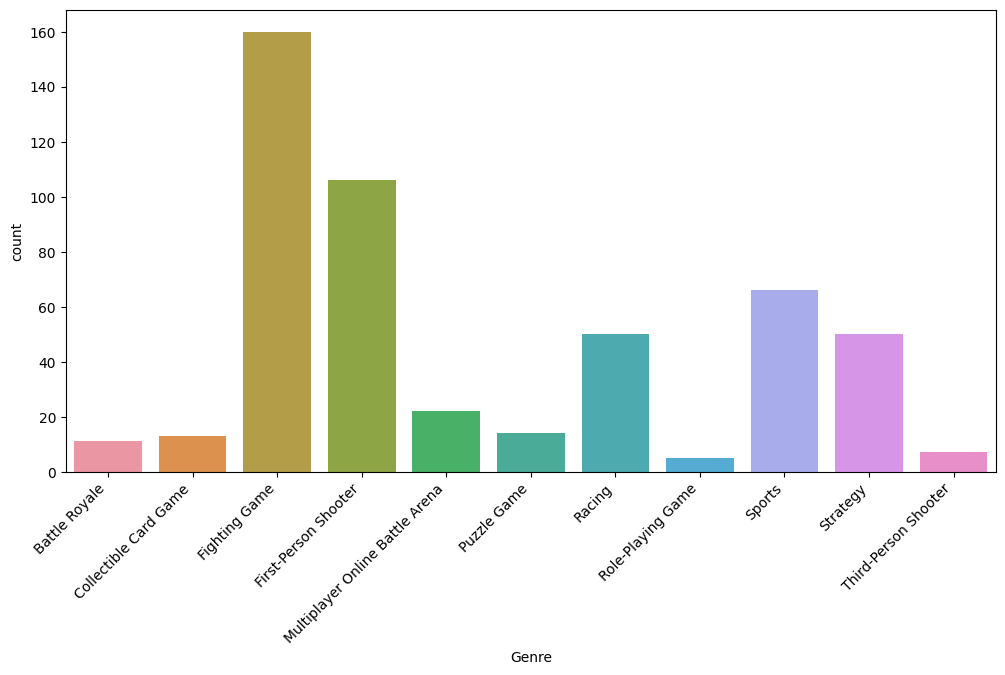

In [ ]:
#Counting how many elements are in each genre
# Create a count plot with rotated x-axis labels
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(data=df, x='Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


As we can observe on this graph, the genre with the larger number of tournaments is Fighting games with FPS ( first person shooter ) coming in second. It would be natural to assume that these are the most popular Esports game. However, when we take a look at the total money generated in each category :

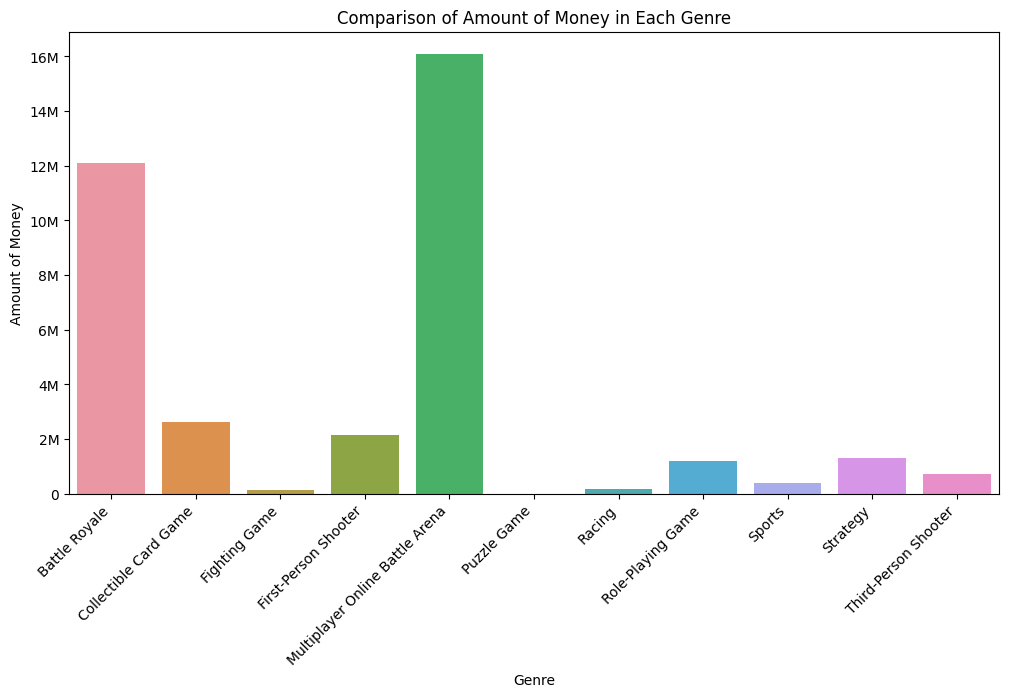

In [ ]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.barplot(data=df, x='Genre', y='TotalMoney', errorbar=None)

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Amount of Money')
plt.title('Comparison of Amount of Money in Each Genre')
plt.xticks(rotation=45, ha='right')

def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
# Show the plot
plt.show()


The result goes against our previous conclusion. Here, it is MOBA ( Multiplayer Online Battle Arena ) and BR ( battle royale ) that are at the top, and by a large margin. In fact, Fighting games are among the lowest in this category. Now let's take a look at the number of tournaments in each category :

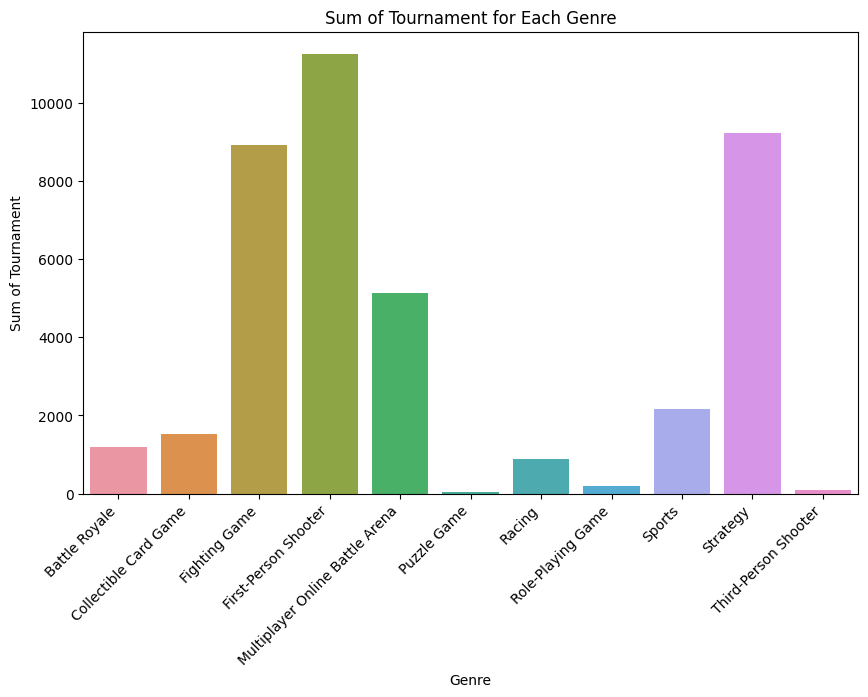

In [ ]:
sum_trnmt_by_genre = df.groupby('Genre')['TournamentNo'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='TournamentNo', data=sum_trnmt_by_genre)
plt.xlabel('Genre')
plt.ylabel('Sum of Tournament')
plt.title('Sum of Tournament for Each Genre')

plt.xticks(rotation=45, ha='right')

plt.show()

Once again, the results are unexpected. the FPS genre is first, followed by Strategy then Fighting games. MOBA which is first in total money